# AGRON 845 - Mid-term Exam 2

**Date**: 24 April 2024

**Team names**: Andres Patrignani (Instructor)



## General Instructions

The team has 50 minutes to solve the provided challenge. The team needs to work on a single computer. Each team member will have 10 minutes to code. When the time is up, a new team member will take the seat and code for another 10 minutes. You can choose the order of each person, but you can only repeat members after every group member had the chance to code for 10 minutes. Other team members can use their computers to help or assist the person that is coding.

When you are done, upload the exam to Canvas. If for some reason the Canvas upload is not working, please send the exam to my e-mail:`andrespatrignani@ksu.edu`. 

Everything about your answer will be evaluated, including: code readability, documentation and comments, overall clarity and organization


You are allowed to:

- Use lecture notes
- Use the help for each module through the Jupyter Lab

You are NOT allowed to:
- Use online search engines (e.g., Google, Bing, etc.)
- Use copilot or generative AI tools

## Challenge


The Proctor compaction test is typically used by engineers and soil scientists to determine the moisture content at which maximum bulk density occurs. The soil moisture at which the greatest compaction level is achieved is called the `critical moisture content` (CMC). From the agronomic point of view, the CMC is the soil moisture condition at which soil compaction due to farming machinery traffic could be greatest.

Your goal is to use the data provided below to find the CMC at which the soil is most susceptible to compaction. This is probably a soil moisture content where we want to avoid getting into and driving across the field.

**Data source**<br>

The data source includes moisture levels and corresponding bulk density levels for a Richfield silt loam soil under continuous wheat in Tribune, KS. 

- Moisture content has units of % (This is the x variable)
- Bulk density has units of $g/cm^3$ (This is the y variable)

Data from `Figure 1B` in: Blanco‐Canqui, H., Stone, L. R., Schlegel, A. J., Benjamin, J. G., Vigil, M. F., & Stahlman, P. W. (2010). Continuous cropping systems reduce near‐surface maximum compaction in no‐till soils. Agronomy journal, 102(4), 1217-1225. https://doi.org/10.2134/agronj2010.0113





In [6]:
# Select random groups
import numpy as np
from pprint import pprint
np.random.seed(7)
students = np.array(['Gabriel','Simran','Cesar','Eduardo','Kelechi','Treman','Mahek',
           'Leonardo','Manavjot','Sindhu','Sudipti','Emmanuela','Jorge'])

groups = {}
counter = 0
while len(students) > 0:
    counter += 1
    if len(students) > 4:
        idx = np.random.choice(range(len(students)), size=3, replace=False)
        groups[counter] = students[idx]
        students = np.delete(students, idx)
        
    else:
        groups[counter] = students
        break
        
pprint(groups)

{1: array(['Manavjot', 'Sudipti', 'Cesar'], dtype='<U9'),
 2: array(['Simran', 'Kelechi', 'Eduardo'], dtype='<U9'),
 3: array(['Mahek', 'Gabriel', 'Treman'], dtype='<U9'),
 4: array(['Leonardo', 'Sindhu', 'Emmanuela', 'Jorge'], dtype='<U9')}


In [25]:
# Data
bulk_density = [1.271, 1.333, 1.454, 1.517, 1.565, 1.576, 1.526, 1.454, 1.394, 1.297]
moisture = [2.69, 7.39, 12.2, 14.9, 17.3, 19.7, 22.0, 25.4, 28.4, 33.0]


In [19]:
# Import modules
import numpy as np
import numpy.polynomial as P
import matplotlib.pyplot as plt


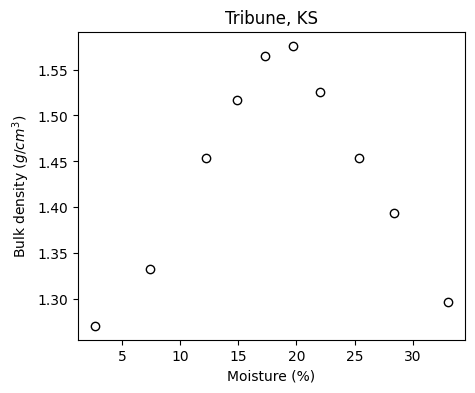

In [20]:
# Create figure to inspect data
# Add location in title
# Add proper axis labels with units
plt.figure(figsize=(5,4))
plt.scatter(moisture, bulk_density, facecolor='w', edgecolor='k')
plt.title('Tribune, KS')
plt.xlabel('Moisture (%)')
plt.ylabel('Bulk density ($g/cm^3$)')
plt.show()


In [57]:
# Fit a polynomial model to the data
par = P.polynomial.polyfit(moisture, bulk_density, deg=5)


In [53]:
# Print value of fitted parameters
print(par)


[ 1.33868123e+00 -4.43600080e-02  8.23066178e-03 -3.59811092e-04
  4.00216939e-06  1.64796529e-08]


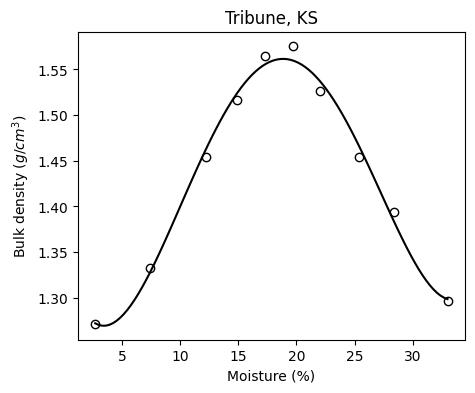

In [58]:
# Create figure showing the fitted model and the observed data points
# Add a line to save the figure as figure_1.jpg with a resolution of 300 dpi

x_curve = np.linspace(np.min(moisture), np.max(moisture), 100)
y_curve = P.polynomial.polyval(x_curve, par)

plt.figure(figsize=(5,4))
plt.scatter(moisture, bulk_density, facecolor='w', edgecolor='k')
plt.plot(x_curve, y_curve, '-k')
plt.title('Tribune, KS')
plt.xlabel('Moisture (%)')
plt.ylabel('Bulk density ($g/cm^3$)')
plt.savefig('figure_1.jpg', dpi=300)
plt.show()


In [56]:
# Find and print the critical water content to one decimal place.
idx_cwc = np.argmax(y_curve)
cwc = x_curve[idx_cwc]

print(f'The CWC is {round(cwc,1)} %')


The CWC is 18.9 %


#### Write a brief statement explaining the significance of your finding

Answer: For this particular field and soil type, the greatest compaction occurs with a soil moisture content of about 19%. This means that driving farming machinery at this moisture content could result in the greatest level of soil compaction. Ideally, the farmer should avoid driving heavy machinery at this moisture contion.
